In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Análise exploratória

In [ ]:
breast_cancer = datasets.load_breast_cancer()
wine = datasets.load_wine()

In [ ]:
# Dividindo o dataset load_wine() em features e target

X_winedata = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
y_winedata = pd.DataFrame(data=wine['target'], columns=['target'])

In [ ]:
X_winedata.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Dividindo o dataset load_breast_cancer() em features e target

X_cancerdata = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
y_cancerdata = pd.DataFrame(data=breast_cancer['target'], columns=['target'])

In [ ]:
X_cancerdata.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Aplicando scale aos dados, para que a diferença de grandezas não atrapalhe o funcionamento de alguns algoritmos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_winedata = scaler.fit_transform(X_winedata)
X_cancerdata = scaler.fit_transform(X_cancerdata)

In [ ]:
# Utilizando os classificadores

In [ ]:
clf_svm = SVC()
clf_knn = KNeighborsClassifier()
clf_gb = GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import cross_validate

scoring_list = ['f1_macro', 'accuracy']

scores_svm_cancer = cross_validate(clf_svm, X_cancerdata, y_cancerdata, cv=4, scoring=scoring_list)
scores_knn_cancer = cross_validate(clf_knn, X_cancerdata, y_cancerdata, cv=4, scoring=scoring_list)
scores_gb_cancer = cross_validate(clf_gb, X_cancerdata, y_cancerdata, cv=4, scoring=scoring_list)

scores_svm_wine = cross_validate(clf_svm, X_winedata, y_winedata, cv=4, scoring=scoring_list)
scores_knn_wine = cross_validate(clf_knn, X_winedata, y_winedata, cv=4, scoring=scoring_list)
scores_gb_wine = cross_validate(clf_gb, X_winedata, y_winedata, cv=4, scoring=scoring_list)

scores = [scores_svm_cancer, scores_svm_wine, scores_knn_cancer, scores_knn_wine, scores_gb_cancer, scores_gb_wine]

for score in scores: 
  print(score)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'fit_time': array([0.00923848, 0.00669837, 0.00639367, 0.00663209]), 'score_time': array([0.00328207, 0.00290108, 0.00298572, 0.0028131 ]), 'test_f1_macro': array([0.96266903, 0.9771496 , 0.96965812, 0.9776671 ]), 'test_accuracy': array([0.96503497, 0.97887324, 0.97183099, 0.97887324])}
{'fit_time': array([0.00264502, 0.00250411, 0.00250196, 0.00232911]), 'score_time': array([0.00138521, 0.00140071, 0.00142932, 0.00134397]), 'test_f1_macro': array([1.        , 0.9566539 , 0.97598344, 1.        ]), 'test_accuracy': array([1.        , 0.95555556, 0.97727273, 1.        ])}
{'fit_time': array([0.00860667, 0.00289726, 0.00278187, 0.002841  ]), 'score_time': array([0.01062465, 0.00874209, 0.00892758, 0.00930882]), 'test_f1_macro': array([0.95467033, 0.96965812, 0.96158632, 0.96277851]), 'test_accuracy': array([0.95804196, 0.97183099, 0.96478873, 0.96478873])}
{'fit_time': array([0.00205588, 0.00230908, 0.00288773, 0.00325251]), 'score_time': array([0.00370121, 0.00335979, 0.00552535, 0.0058

In [ ]:
# Plotando as métricas escolhidas (acurária e f1) para os dois datasets

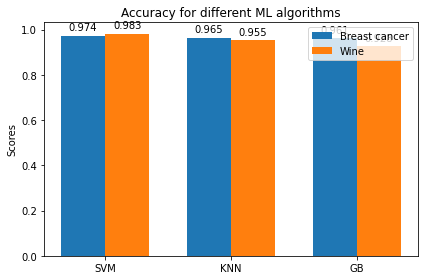

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

labels = ['SVM', 'KNN', 'GB']
breast_cancer = [round(scores_svm_cancer['test_accuracy'].mean(),3), round(scores_knn_cancer['test_accuracy'].mean(),3), round(scores_gb_cancer['test_accuracy'].mean(),3)]
wine = [round(scores_svm_wine['test_accuracy'].mean(),3), round(scores_knn_wine['test_accuracy'].mean(),3), round(scores_gb_wine['test_accuracy'].mean(),3)]

loc = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loc1 = [x - width/2 for x in loc]
loc2 = [x + width/2 for x in loc]

fig, ax = plt.subplots()
rects1 = ax.bar(loc1, breast_cancer, width, label='Breast cancer')
rects2 = ax.bar(loc2, wine, width, label='Wine')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy for different ML algorithms')
ax.set_xticks(loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

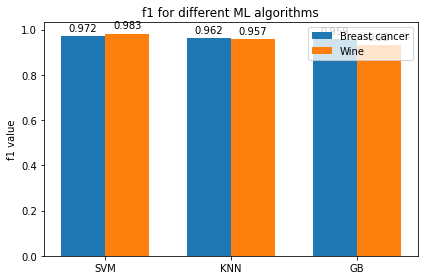

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

labels = ['SVM', 'KNN', 'GB']
breast_cancer = [round(scores_svm_cancer['test_f1_macro'].mean(),3), round(scores_knn_cancer['test_f1_macro'].mean(),3), round(scores_gb_cancer['test_f1_macro'].mean(),3)]
wine = [round(scores_svm_wine['test_f1_macro'].mean(),3), round(scores_knn_wine['test_f1_macro'].mean(),3), round(scores_gb_wine['test_f1_macro'].mean(),3)]

loc = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
loc1 = [x - width/2 for x in loc]
loc2 = [x + width/2 for x in loc]

fig, ax = plt.subplots()
rects1 = ax.bar(loc1, breast_cancer, width, label='Breast cancer')
rects2 = ax.bar(loc2, wine, width, label='Wine')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1 value')
ax.set_title('f1 for different ML algorithms')
ax.set_xticks(loc)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()